In [9]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("sales_data.csv")

# Display basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   200 non-null    object 
 1   Region    200 non-null    object 
 2   Sales     200 non-null    float64
 3   Profit    200 non-null    float64
 4   Discount  200 non-null    float64
 5   Category  200 non-null    object 
 6   Date      200 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.1+ KB
None
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64
   Product Region    Sales   Profit  Discount     Category        Date
0  Printer  South  1345.40  1202.60     46.68    Furniture  2019-01-01
1    Phone   East  1546.92    93.77      0.38  Electronics  2019-01-02
2    Mouse   East  1680.50   500.56     11.27    Furniture  2019-01-03
3  Monitor   West  4258.48   694.29     18.27    Furniture  2019-01-04
4  Printer   West   7

In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values: 
# - Numeric columns: Fill with median
# - Categorical columns: Fill with mode
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])


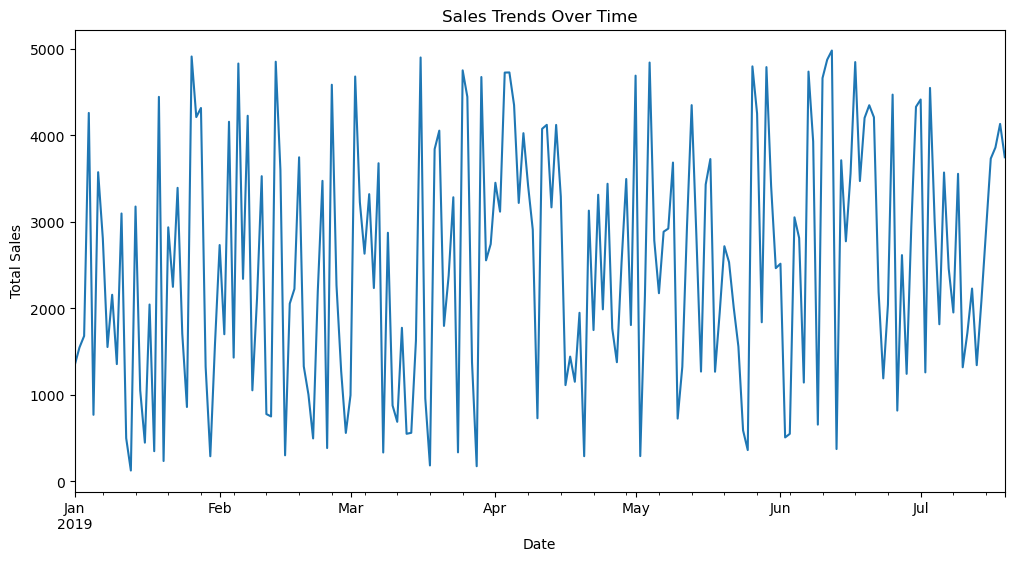

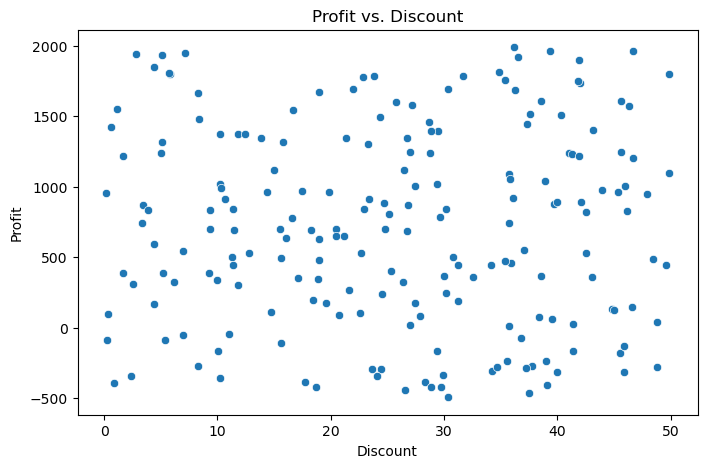

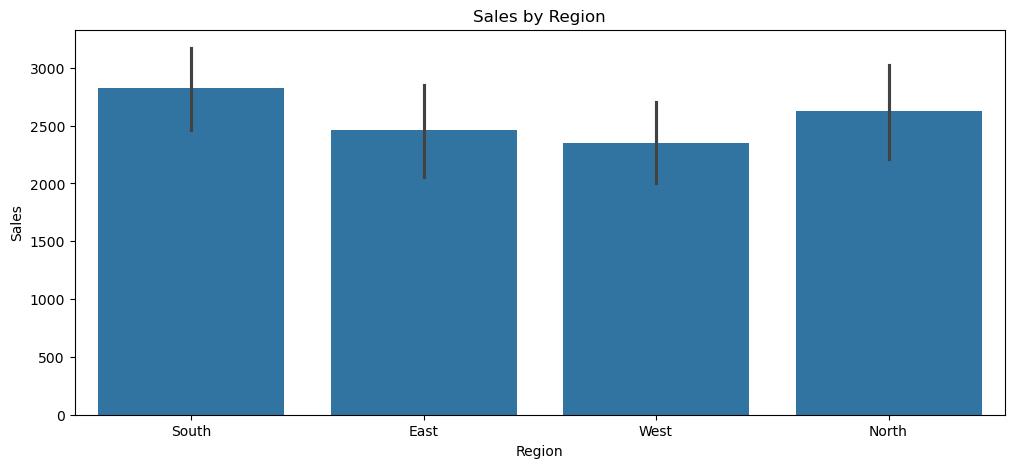

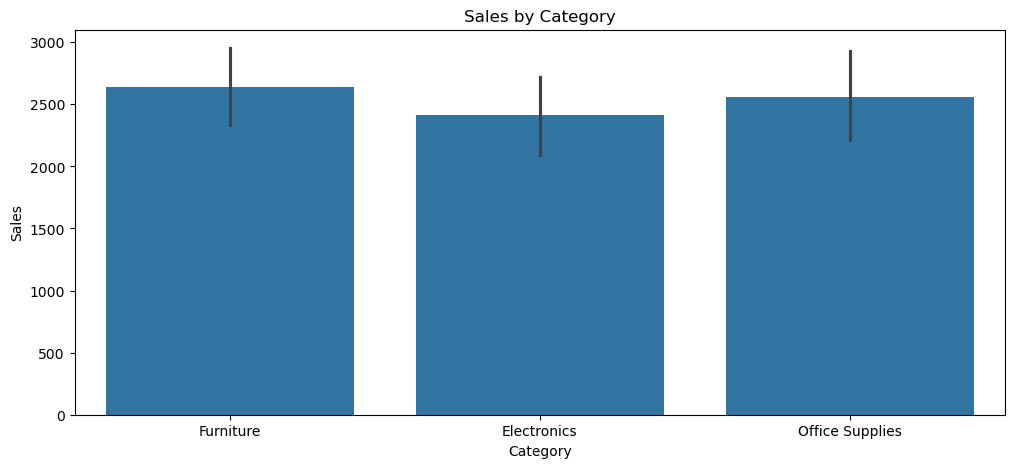

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trend over time
plt.figure(figsize=(12, 6))
df.groupby('Date')['Sales'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.show()

# Scatter plot: Profit vs. Discount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Discount'], y=df['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount')
plt.show()

# Sales by Region and Category
plt.figure(figsize=(12, 5))
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1278.329956755838
Mean Squared Error: 2133701.0872972845
R-squared Score: 0.03034439147325496
